In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

## Задача 1.2
Изучите стоимости недвижимости

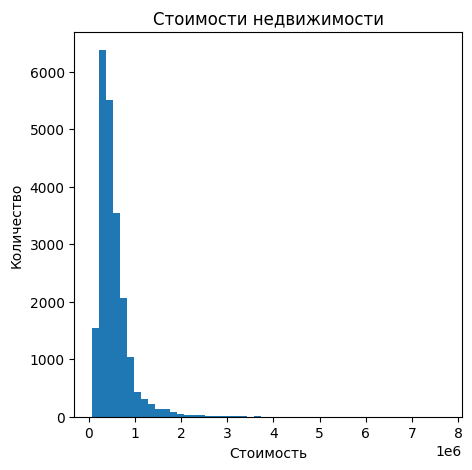

In [2]:
plt.figure(figsize=(5, 5))
plt.hist(df['price'], bins=50)
plt.title('Cтоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

## Задача 1.3
Изучите распределение квадратуры жилой

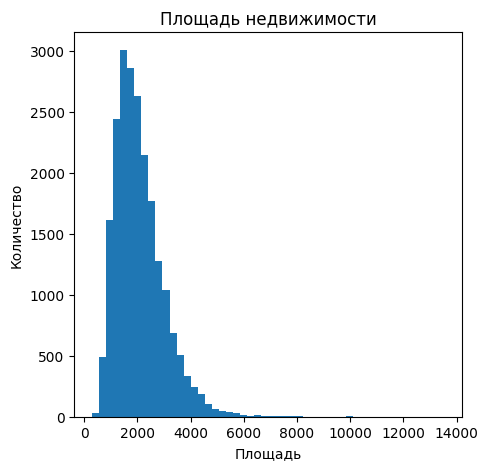

In [3]:
plt.figure(figsize=(5, 5))
plt.hist(df['sqft_living'], bins=50)
plt.title('Площадь недвижимости')
plt.xlabel('Площадь')
plt.ylabel('Количество');

## Задача 1.4 
Изучите распределение года постройки

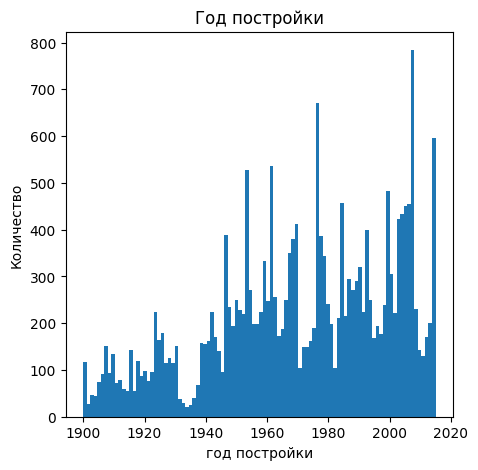

In [19]:
plt.figure(figsize=(5, 5))
plt.hist(df['yr_built'], bins=100)
plt.title('Год постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество');

# 2 задача
Постройте график

Сделайте выводы

## Задача 2.1 
Изучите распределение домов от наличия вида на набережную

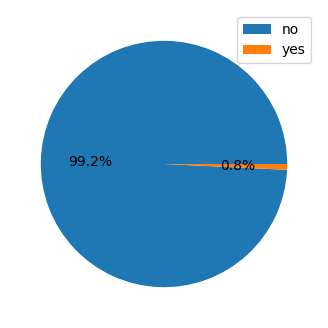

In [10]:

# plt.hist(df['waterfront'], bins=2)
# plt.title('Вид на море')
# plt.xlabel('вид на море')
# plt.ylabel('Количество')

data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

## Задача 2.2
Изучите распределение этажей домов

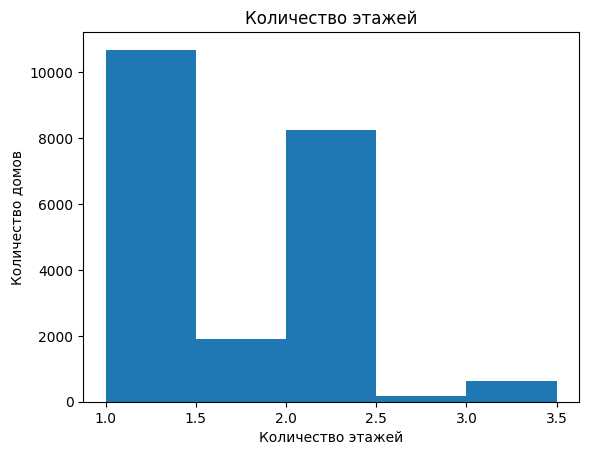

In [29]:
plt.hist(df['floors'], bins=5)
plt.title('Количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

## Задача 2.2
Изучите распределение состояния домов

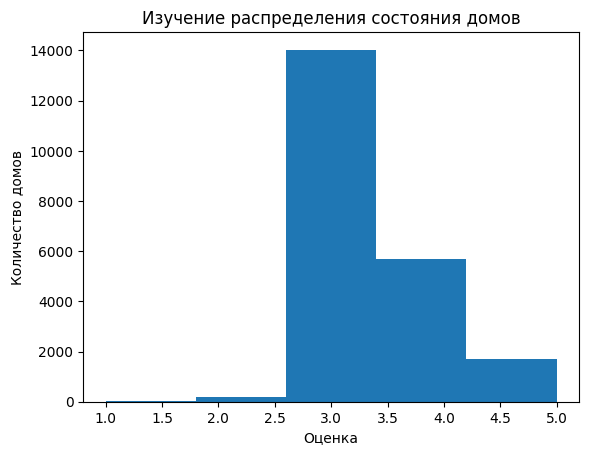

In [13]:
plt.hist(df['condition'], bins=5)
plt.title('Состояния домов')
plt.xlabel('Оценка')
plt.ylabel('Количество домов');

# 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для начала мы сделаем тепловую карту по матрице корреляции чтоб понять куда смотреть.

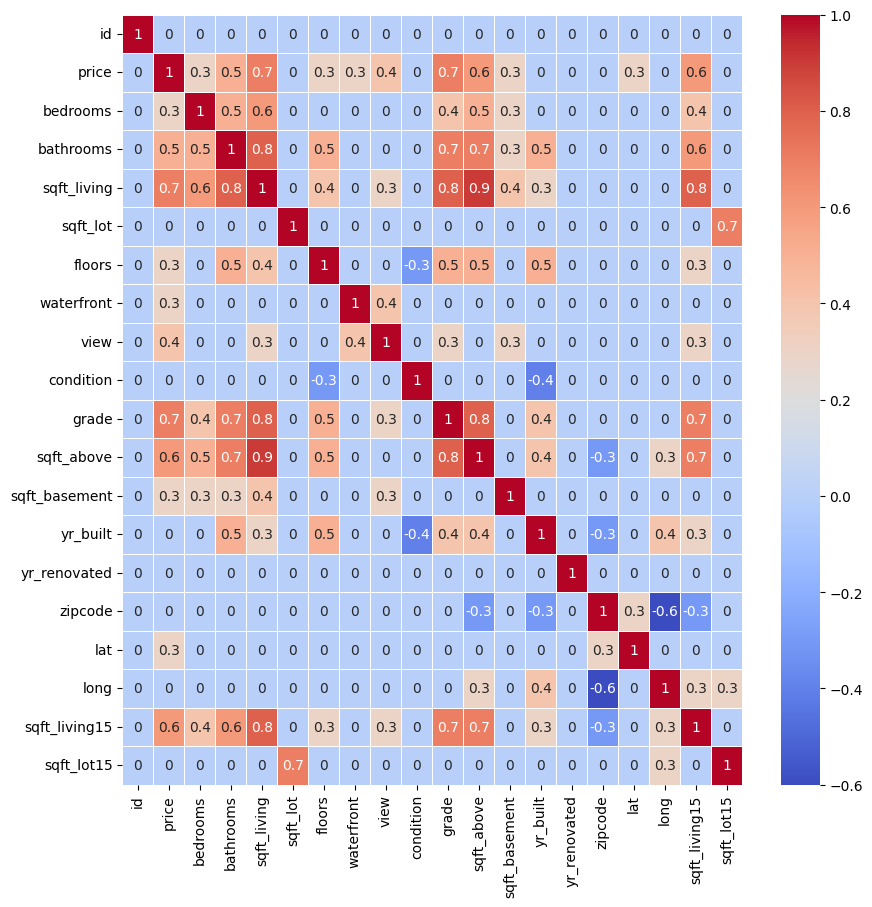

In [30]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

На графике мы видим что на стоимость оказывают большее влияние следующие факторы:
- Grade
- sqft_living
- view
- sqrt_above

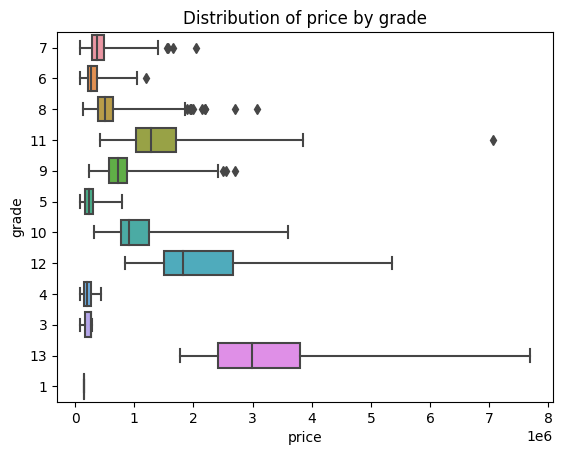

In [33]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

На графике мы видим чем лучше grade здания, тем выше у него стоимость и самые дорогие варианты представлены с Grade 12 и 13

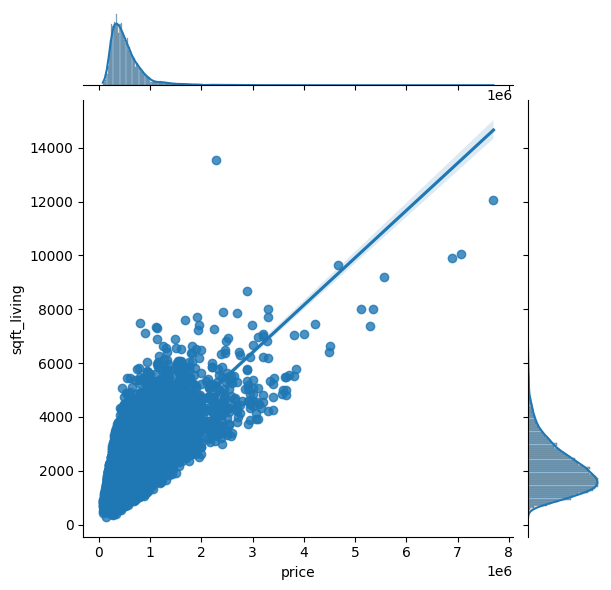

In [37]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

На графике мы видим что действительно имеется зависимость стоимости от размера жилой площади

Text(0, 0.5, 'view')

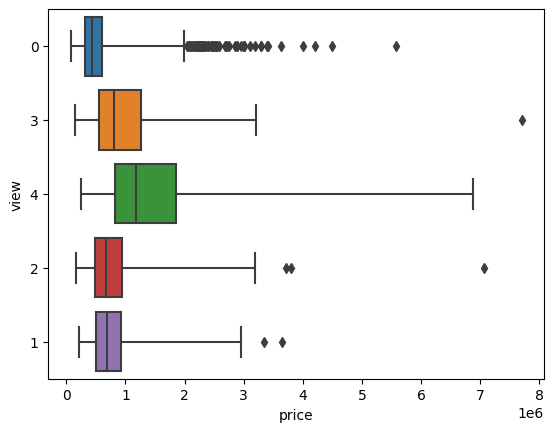

In [39]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=5);
plt.xlabel('price')
plt.ylabel('view')

На этом графике мы видим что чем выше оценка вида, тем дороже стоят дома.